## L1 - Linear models and gradient descent

### Books
1. [Deep Learning, I. Goodfellow, Y. Bengio and A. Courville](http://www.deeplearningbook.org/)
2. [Neural networks for pattern recognition, C. Bishop](http://cs.du.edu/~mitchell/mario_books/Neural_Networks_for_Pattern_Recognition_-_Christopher_Bishop.pdf)
3. [Machine learning: a probabilistic perspective, K. Murphy](http://dsd.future-lab.cn/members/2015nlp/Machine_Learning.pdf)

### 0. Basic classification

Here you can see basic (possible, non standard) classification of [machine learning](https://en.wikipedia.org/wiki/Machine_learning) tasks.
1. [Supervised learning](https://en.wikipedia.org/wiki/Supervised_learning)
 1. [Regression](https://en.wikipedia.org/wiki/Regression_analysis)
 2. [Classification](https://en.wikipedia.org/wiki/Statistical_classification)
 3. [Ranking](https://en.wikipedia.org/wiki/Learning_to_rank)
2. [Reinforcment learning](https://en.wikipedia.org/wiki/Reinforcement_learning)
3. [Unsupervised learning](https://en.wikipedia.org/wiki/Unsupervised_learning)
 1. Clustering 
 2. Manifold learning
 3. Matrix decompostion (factorization)
 4. Dimension reduction
 
In this lab we consider only supervised learning. Namely, linear regression and binary linear classification, as simple methods for beginning.

### 1. Supervised learning basics
A supervised learning algorithm is an algorithm that is able to learn from data. Now we need only to clarify what is data and what it means to learn?

Let $\{x_i\}_{i=1}^{\mathcal{l}} \subset \mathbb{X} = \mathbb{R}^{n}$ and $\{y_i\}_{i=1}^{\mathcal{l}} \subset \mathbb{Y}$. Here $\mathbb{X}$ is the whole set of objects and $\mathbb{Y}$ is all possible labels of objects, so $\{x_i\}_{i=1}^{\mathcal{l}}$ is subset with known labels $\{y_i\}_{i=1}^{\mathcal{l}}$. We want to find algorithm, that can predict $y$ for any $x \in \mathbb{X}$. Actually, $x = (x^1, \dots, x^n)$ is some vector of features (formal description), but $x^k$ can have different nature. 

* $x^k \in \{0, 1\}$ – binary feature, boolean flag
* $x^k \in \{1,\dots, m\}$ – categorical (nominal), classification of entities into particular categories.
* $x^k \in \{1,\dots, m\}^<$ – ordinal, classification of entities in some kind of ordered relationship.
* $x^k \in \mathbb{R}$ – cardinal, classification based on a numerical value.

Categorical features are commonly encoded in some way (for exaple [one-hot encoding](https://en.wikipedia.org/wiki/One-hot)) to ignore false ordering (important for metric algorithms). Moreover it's possible to cast any type of feature to $\mathbb{R}$, that's why we suppouse that $\mathbb{X} = \mathbb{R}^{n}$ further.

Process of finding algorithm, that can predict labels, is called training. Usually, it is reduced to minimization problem of the empirical risk.
$$\arg \min_{\theta} Q(\theta) = \arg \min_{\theta} \frac{1}{\mathcal{l}}\sum_{i=1}^{\mathcal{l}} \mathcal{L}(f(x_i | \theta), y_i).$$
Here $\mathcal{L}$ – some loss function that shows how good we predict $y$, and $f(x|\theta)$ is parametric function, where $\theta \in \Theta$.

### 2. Linear regression
For regression task $\mathbb{Y} = \mathbb{R}$. In case of linear model we have learning vector of parameters $w \in \mathbb{R}^n$ and predict $y$ as 
$$y = w^Tx + b.$$

For simplicity, let the last element of $x$ is always $1$ and $w$ is concatenation of $[w, b]$. So, we can rewrite model as $y = w^Tx$. For MSE (mean square error) we have following optimization problem
$$\arg \min_{w} Q(w) = \arg \min_{w} \sum_{i=1}^{\mathcal{l}}\big(w^Tx_i - y_i\big)^2.$$

Let $X$ is matrix, where $i$-th row is feature vector of $i$-th object and $Y$ – vector of labels. In this case our expression can be rewritten in matrix form
$$\arg\min_{w}||Xw - Y ||_{2}.$$
But this problem is already well studied and has the analytical solution
$$w = (X^TX)^{-1}X^TY.$$

#### Exercises
1. Let $y = sin(x) + \varepsilon$, where $x \in [0, 2\pi]$ and $\varepsilon \sim \mathcal{N}(0, 0.1)$. Generate 20 train samples and try to learn regression model.
2. Plot train data and model's predictions.
3. As you see, model has no enough capacity to fit train data. Let's add polynomial features, namely $x^2$ and $x^3$.
4. Train linear model one more time and plot results again.
5. What happens if you add more features, for example full range $x^{0},\dots,x^{7}$? 

Меняя значение максимальной степени, можно посмотреть на оптимизацию любым полиномом

Это автоматизировано в следующем задании

0.215441310741


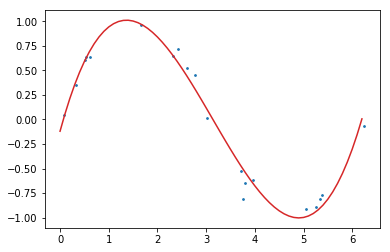

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

samples = np.empty((20,2))

samples[:,0] = np.random.random(20)
samples[:,0] *= 2 * np.pi

for i in range(20):
    samples[i,1] = np.sin(samples[i,0]) + np.random.normal(0,0.1)
    
x_plot = np.arange(0, 2*np.pi, 0.1)


def regression(DEG, samples):
    X = np.empty((20, DEG + 1))
    Y = np.arange(20, dtype=np.float32)
    for i in range(20):
        var = 1
        for d in range(DEG + 1):
            X[i, DEG - d] = var
            var *= samples[i,0]
        Y[i] = samples[i, 1]

    params = np.empty(DEG + 1)
    for i in range(20):
        params = (np.matmul(np.matmul(inv(np.matmul(np.transpose(X), X)), np.transpose(X)), Y))

    x_predict = np.arange(0, 2*np.pi, 0.1)
    y_predict = np.arange(0, 2*np.pi, 0.1)
    
    loss = 0.0
    for i in range(20):
        cur_loss = (np.matmul(params, X[i]) - Y[i])
        loss += cur_loss * cur_loss
    
    for i in range(0, 63):
        cur = 0
        var = 1
        for j in range(DEG + 1):
            cur += var * params[DEG - j]
            var *= x_predict[i]
            
        y_predict[i] = cur

        
    return (x_predict, y_predict, params, loss)


        

(x_pred, y_pred, param, loss) = regression(3, samples)
print(loss)
plt.plot(x_pred, y_pred, color='C3')



plt.scatter(samples[:,0], samples[:,1], s=3)
plt.show()

### 3. Validation
The data used to build the final model usually comes from multiple datasets. In particular, three data sets are commonly used in different stages of the creation of the model.

1. We initially fit our parameters on a __training dataset__, that consists of pairs of a feature vector and the corresponding answer. The current model is run with the training dataset and produces a result, which is then compared with the target, for each input vector in the training dataset. Based on the result of the comparison and the specific learning algorithm being used, the parameters of the model are adjusted. The model fitting can include both variable selection and parameter estimation.

2. Second one called the __validation dataset__. The validation dataset provides an unbiased evaluation of a model fit on the training dataset while tuning the model's hyperparameters (e.g. regularization coefficient or number of hidden units in a neural network). Validation datasets can be used for regularization by early stopping: stop training when the error on the validation dataset increases, as this is a sign of overfitting to the training dataset. This simple procedure is complicated in practice by the fact that the validation dataset's error may fluctuate during training. This complication has led to the creation of many ad-hoc rules for deciding when overfitting has truly begun.

3. Finally, the __test dataset__ is a dataset used to provide an unbiased evaluation of a final trained model.

Cross-validation is a validation technique for estimating how accurately a predictive model will perform in practice. The goal of cross validation is to limit problems like overfitting, give an insight on how the model will generalize to an independent dataset.

Cross-validation involves partitioning a sample of data into complementary subsets, performing the analysis on one subset and making validation on the other. To reduce variability, multiple rounds of cross-validation are performed using different partitions, and the validation results are caveraged over the rounds to estimate a final predictive model.

There are following types:
1. Leave-p-out cross-validation - using p observations as the validation set with all possible ways.
2. k-fold cross-validation - split data into k folds and using each one as validation set.
3. Holdout validation - randomly split data into training and validation set
4. Repeated random sub-sampling validation - repeatedly make random splits of data into training and validation set

#### Exercises
1. Generate 20 validation samples
2. Check quality of your model on train set and validation set.
3. Have you experienced [overfitting](https://en.wikipedia.org/wiki/Overfitting)?
4. Please, read [this article](https://en.wikipedia.org/wiki/VC_dimension) to learn more about model capacity and VC-dimension.

Тут я обучаю на train_set полиномы степени до 10 включительно и смотрю, при какой степени будет наименьшая потеря для валидационной выборки

Это далеко не 10-ая степень - на ней модель уже переобучена

deg: 1 -- train loss: 3.5857730633  validation set loss: 4.09362962782
deg: 2 -- train loss: 3.5407164113  validation set loss: 4.44547288469
deg: 3 -- train loss: 0.215441310741  validation set loss: 0.509692239633
deg: 4 -- train loss: 0.184629455109  validation set loss: 0.674454745512
deg: 5 -- train loss: 0.108193549822  validation set loss: 0.400700304406
deg: 6 -- train loss: 0.103607267181  validation set loss: 0.380185153895
deg: 7 -- train loss: 0.0935905291284  validation set loss: 0.569778781292
deg: 8 -- train loss: 0.0935813560389  validation set loss: 0.56079983665
deg: 9 -- train loss: 0.0766886289619  validation set loss: 1.61314402001
deg: 10 -- train loss: 0.0625278096463  validation set loss: 28.0592050116

the lowest loss on validation set is reached with a polynomial of degree: 7


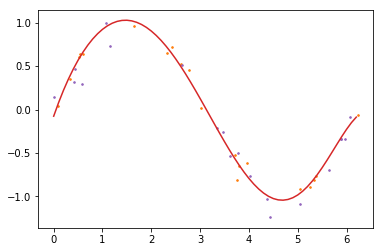

In [2]:
valid_samp = np.empty((20, 2))
valid_samp[:,0] = np.random.random(20)
valid_samp[:,0] *= 2*np.pi
valid_samp[:,1] = np.empty(20)
for i in range(20):
    valid_samp[i,1] = np.sin(valid_samp[i,0]) + np.random.normal(0,0.1)
#print(valid_samp)

def estim_loss(samples, params):
    deg = params.size - 1
    X = np.empty((20, deg + 1))
    Y = samples[:,1]
    loss = 0.0
    for i in range(20):
        var = 1
        for j in range(deg + 1):
            X[i, deg - j] = var
            var *= samples[i, 0]
        #print(X[i])
    for i in range(20):
        cur_loss = np.matmul(params, X[i]) - Y[i]
        #print(cur_loss)
        loss += cur_loss * cur_loss
    
    return loss

best_param = np.empty(i + 1)
best_loss = 100
for i in range(1,11):
    (cur_x_pred, cur_y_pred, cur_param, cur_loss) = regression(i, samples)
    #print("check:", estim_loss(samples, cur_param), "and", cur_loss)
    valid_loss = estim_loss(valid_samp, cur_param)
    if best_loss > valid_loss:
        best_loss = valid_loss
        best_param = cur_param
    print("deg:", i, "-- train loss:", cur_loss, " validation set loss:", valid_loss)
    
        
        
plt.scatter(samples[:,0], samples[:,1], s=2.5, color='C1')
plt.scatter(valid_samp[:,0], valid_samp[:,1], s=2.5, color='C4')

x_predict = np.arange(0, 2*np.pi, 0.1)
y_predict = np.arange(0, 2*np.pi, 0.1)
for i in range(0, 63):
    cur = 0
    var = 1
    for j in range(best_param.size):
        cur += var * best_param[best_param.size - j - 1]
        var *= x_predict[i]

    y_predict[i] = cur

plt.plot(x_predict, y_predict, color='C3')
print()
print("the lowest loss on validation set is reached with a polynomial of degree:", best_param.size)
plt.show()

### 4. Binary linear classification
Let $\mathbb{Y} = \{-1, +1\}$ for binary classification. So linear model looks like
$$sign(w^Tx + b),$$
where $w$ is normal to the separating plane, which is defined parametrically $w^Tx+b=0$. In the half-space, which normal is directed, all points has class +1, otherwise -1. Let's assume that all points of hyperplane has class +1 to resolve the ambiguity. Also we rewrite model in the short variant $sign(w^Tx)$.

As with regression, training of linear classifier may be reduced to an optimization problem. We only have to specify the loss function. The most nature option is
$$\mathcal{L}(y_{pred}, y_{true}) = [y_{pred} \neq y_{true}] = [M < 0],$$
where $M$ is the margin value $yw^Tx$, which indicates how far the classifier puts a point in its class. But this loss has one drawback, it's not differentiable. That's why the optimization problem becomes very complex. However we can use any other function, which majorizes this loss. You can find some popular options below

1. MSE has one big advantage, we optimize convex function with a local minimum. Moreover analytic solution exists.
$$\big(w^Tx - y \big)^2$$

2. Hinge loss function makes our linear classifier [SVM](https://en.wikipedia.org/wiki/Support_vector_machine) (support vector machine).
$$max \big(0, 1 - yw^Tx \big)$$

3. Logistic loss function has a probabilistic meaning. In particular, this loss leads us to the optimal [Bayesian classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) under certain assumptions on the distribution of features. But it's a different story. So it is often used in practice.
$$\ln \big( 1 + \exp(-yw^Tx) \big)$$

#### Exercises
1. Let $\mathbb{P}\{y=1|x\} = \sigma(wx)$, where $\sigma(z) = \frac{1}{1 + \exp(-z)}$. Show that problem below it is nothing like the maximization of the likelihood.
$$\arg\min_{w}Q(w) = \arg\min_{w} \sum_{x, y} \ln \big(1 + \exp(-yw^Tx )) \big)$$
2. Plot all loss functions in the axes $M \times L$.
3. Generate two normally distributed sets of points on the plane.
4. Let points of 1th set (red color) have class +1 and point of 2d set (blue color) have -1.
5. Train linear classifier with MSE (use analytical solution), which splits these sets.
6. Plot points and separating line of trained classifier.
7. What is time comlexity of your solution?

Our problems is in maximazing the following: $ \displaystyle \prod_{i} (\mathbb{P}(y_{pred} = y_{true} \mid x_i )) \rightarrow max$

It is the same as: $ \displaystyle \ln \left( \prod_{i} \mathbb{P}(y_{pred} = y_{true} \mid x_i )\right)  \rightarrow max $

$\displaystyle \ln \left( \prod_{i} \mathbb{P}(y_{pred} = y_{true} \mid x_i )\right)  \rightarrow max$
$$\sum_{i}\ln(\mathbb{P}(y_{pred} = y_{true} \mid x_i)) \rightarrow max $$
$$ln(x) = -ln(x^{-1})$$
$$\sum_{i}\ln(\mathbb{P}(y_{pred} = y_{true} \mid x_i) ^ {-1}) \rightarrow min $$
$$\sum_{i}\ln(1 + exp(-yw^{T}x)) \rightarrow min $$


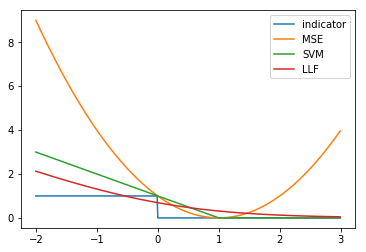

In [3]:
x_funcs = np.arange(-2,3,0.01)

y_indicator = np.empty(500)
for i in range(500):
    if x_funcs[i] < 0:
        y_indicator[i] = 1
    else:
        y_indicator[i] = 0

y_MSE = np.empty(500)
for i in range(500):
    y_MSE[i] = ((x_funcs[i] - 1) * (x_funcs[i] - 1))
    
y_SVM = np.empty(500)
for i in range(500):
    y_SVM[i] = max(0, 1 - x_funcs[i])
    
y_LLF = np.empty(500)
for i in range(500):
    y_LLF[i] = np.log(1 + np.exp(-x_funcs[i]))
    
indic_f, = plt.plot(x_funcs, y_indicator, label='indicator')
MSE_f, = plt.plot(x_funcs, y_MSE, label='MSE')
SVM_f, = plt.plot(x_funcs, y_SVM, label='SVM')
LLF_f, = plt.plot(x_funcs, y_LLF, label='LLF')
plt.legend(handles=[indic_f, MSE_f, SVM_f, LLF_f])
plt.show()

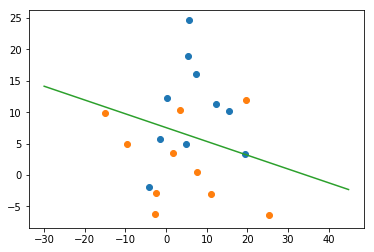

[-0.01357749 -0.06175101  0.46543141]


In [4]:
samples = np.empty((20, 3))

for i in range(10):
    samples[i, 0] = np.random.normal(10, 10)
    samples[i, 1] = np.random.normal(10, 10)
    samples[i, 2] = -1
for i in range(10, 20):
    samples[i, 0] = np.random.normal(7, 10)
    samples[i, 1] = np.random.normal(-2, 10)
    samples[i, 2] = 1

plt.scatter(samples[:10, 0], samples[:10, 1])
plt.scatter(samples[10:20, 0], samples[10:20, 1])
    
X = np.empty((20, 3))
X[:,0] = samples[:,0]
X[:,1] = samples[:,1]
X[:,2] = np.ones(20)
Y = np.empty(20)
Y = samples[:,2]
#print(samples)
#print(X)
#print(Y)


param = np.empty(3)
param = np.matmul(np.matmul(inv(np.matmul(np.transpose(X),X)),np.transpose(X)),Y)
#print(param)

equation = np.array([-param[0]/param[1], -param[2]/param[1]])
#print(equation)

line_x = np.arange(-30,45,0.1)
line_y = np.empty(line_x.shape[0])
for i in range(line_x.shape[0]):
    line_y[i] = equation[0]*line_x[i] + equation[1]
    
plt.plot(line_x, line_y, color='C2')


plt.show()
real_ans = param
print(param)

Сложность завист от сложности матричных операций. Матрица, над которой выполняют операции, - это Х, причем количество столбцов в ней фиксировано - 3. Т.е. размер матрицы - $\mathcal{O}(n)$, где $n$ это количество точек, размер входа. Произведение таких матриц $\mathcal{O}(n^2)$, при том, что их всего несколько. Большую сложность имеет поиск обратной матрицы от нашей матрицы $(n \times n)$ и различные алгоритмы дают сложность от $\mathcal{O}(n^3)$ до $\mathcal{O}(n^{2.373})$, т.е. сложность будет равна сложности этой операции.

### 5. Gradient descent
Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient of the function at the current point. Gradient descent is based on the observation that if function $Q(x)$ is defined and differentiable in a neighborhood of a point $x$, then $Q(x)$ decreases fastest if one goes from $x$  in the direction of the negative gradient.

$$x^{k+1} = x^{k} - \lambda \cdot \triangledown Q(x)$$

Here $\lambda$ is step of descent and  $k$ – step number. If $\lambda$ is too large then algorithm may not converge, otherwise training can last a long time. Also there is rather popular hack to slowly decrease $\lambda$ with each step. You need to understand that gradient descent finds exactly local minimum. The easiest way to fight this problem is make several runs of algorithm or have good initialization.

#### Exercises
1. Suggest some quadratic function $Q: \mathbb{R}^2 \rightarrow \mathbb{R}$ with global minimum.
2. Find minimum with gradient descent method.
3. Plot contour lines.
4. Trace the path of gradient descent.
5. How do you choose $\lambda$?
6. Evaluate time complexity of solution.

Let our function be $Q(x,y) = 3x^2 + y^2$

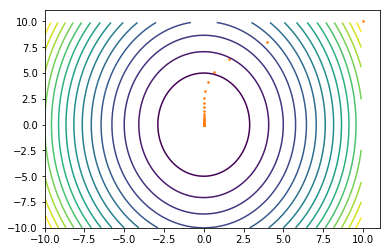

[5.708990770823797e-30, 4.313591466744105e-07]


In [5]:
import pylab

pnt = [10, 10]

L = 0.1

def x_deriv(x):
    return 6*x

def y_deriv(y):
    return 2*y

x_dots = np.empty(1)
y_dots = np.empty(1)
x_dots = [pnt[0]]
y_dots = [pnt[1]]

while (abs(x_deriv(pnt[0])) > 0.000001 or abs(y_deriv(pnt[1])) > 0.000001):
    pnt[0] -= L * (x_deriv(pnt[0]))
    pnt[1] -= L * (y_deriv(pnt[1]))
    x_dots.append(pnt[0])
    y_dots.append(pnt[1])

    
cont_x = np.arange(-10, 10, 0.1)
cont_y = np.arange(-10, 10, 0.1)
grid_x, grid_y = np.meshgrid(cont_x, cont_y)
grid_z = 3 * grid_x * grid_x + grid_y * grid_y
pylab.contour(grid_x, grid_y, grid_z, 15)
plt.scatter(x_dots, y_dots, s=2.5, color='C1')
plt.show()
print(pnt)


$\lambda$ у меня это $L$, я выбрал ее достаточно малой, чтобы алгоритм сходился к экстремуму, но достаточно большой,чтобы он делал это быстро. Например, при $L = 0.4$ уже не сходится

There is category of function which naive gradient descent works poorly for, e.g. [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function).
$$f(x, y) = (1-x)^2 + 100(y-x^2)^2.$$

#### Exercises
1. Repeat previous steps for Rosenbrock function.
2. What problem do you face?
3. Is there any solution?

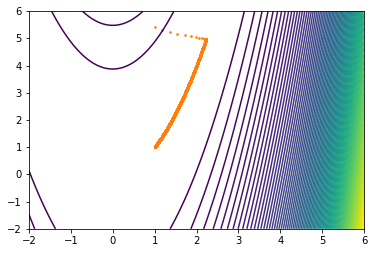

In [6]:
pnt = [5, 5]

L = 0.0001

def x_deriv(pnt):
    x = pnt[0]
    y = pnt[1]
    return 400*x*x*x - 400*x*y + 2*x -2

def y_deriv(pnt):
    x = pnt[0]
    y = pnt[1]
    return 200*y - 200*x*x

x_dots = np.empty(1)
y_dots = np.empty(1)
x_dots = [pnt[0]]
y_dots = [pnt[1]]

while(x_deriv(pnt) > 0.001 or y_deriv(pnt) > 0.001):
    deriv = [x_deriv(pnt), y_deriv(pnt)]
    pnt[0] -= L * deriv[0]
    pnt[1] -= L * deriv[1]
    x_dots.append(pnt[0])
    y_dots.append(pnt[1])
    #print(pnt)

    
cont_x = np.arange(-2, 6, 0.01)
cont_y = np.arange(-2, 6, 0.01)
grid_x, grid_y = np.meshgrid(cont_x, cont_y)
grid_z = (1 - grid_x) * (1 - grid_x) + 100 * (grid_y - grid_x * grid_x) * (grid_y - grid_x * grid_x)
levels = np.arange(-2,2,0.01)
pylab.contour(grid_x, grid_y, grid_z, 100)
plt.scatter(x_dots, y_dots, s=2.5, color='C1')
plt.show()

Проблема в том, что меньше всего значения в этой ложбинке, которая имеет форму параболы, а вокруг экстремума линии уровня располагаются как очень сильно вытянутые по одной из осей эллипсы. Поэтому при приближении к экстремуму появляются скачки перпендикулярно линиям уровня, которые на самом деле имеют близкий к прямому угол по отношению к экстремуму. Чтобы с этим бороться нужно уменьшать коэффициент $\lambda$ со временем и вовремя останавливаться.

There are some variations of the method, for example steepest descent, where we find optimal $\lambda$ for each step.
$$\lambda^{k} = \arg\min_{\lambda}Q(x_k - \lambda\triangledown Q(x_k)).$$

#### Exercises
1. Split red and blue sets of points again. Train linear model using gradient descent and MSE.
2. Plot your splitting line. Compare with analytical solution.
3. Try steepest descent.
4. Comare gradient descent methods and show its convergence in axes $[step \times Q]$.

Это обычный градиентный спуск.

#steps = 3988


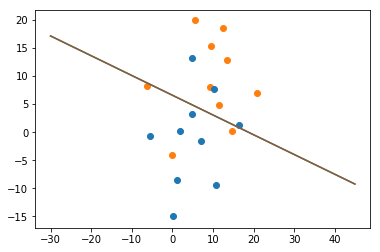

time: 1.3430969715118408
[-0.019744374986333073, -0.055982607150942942, 0.36846779881979225]
[-0.01974434 -0.0559826   0.36846728]


In [7]:
samples = np.empty((20, 3))
import time

time_st = time.time()




for i in range(10):
    samples[i, 0] = np.random.normal(10, 7)
    samples[i, 1] = np.random.normal(10, 7)
    samples[i, 2] = -1
for i in range(10, 20):
    samples[i, 0] = np.random.normal(7, 7)
    samples[i, 1] = np.random.normal(-2, 7)
    samples[i, 2] = 1

plt.scatter(samples[:10, 0], samples[:10, 1], color='C1')
plt.scatter(samples[10:20, 0], samples[10:20, 1], color='C0')
    
X = np.empty((20, 3))
X[:,0] = samples[:,0]
X[:,1] = samples[:,1]
X[:,2] = np.ones(20)
Y = np.empty(20)
Y = samples[:,2]

def estimate_loss(params):
    loss = 0.0
    for i in range(20):
        cur_loss = X[i] @ params - Y[i]
        loss += (cur_loss) * (cur_loss)
    return loss


w = [3, 3, 3]


def deriv(w, var):
    sum = 0.0
    for i in range(20):
        sum += 2*(X[i] @ w - Y[i]) * X[i,var]
    return sum

x_der = deriv(w, 0)
y_der = deriv(w, 1)
b_der = deriv(w, 2)
#print(x_der, y_der, b_der)

K = 0.0002
steps = 0
convergence_func = np.array([0, estimate_loss(w)])
while(abs(x_der) > 0.00001 or abs(y_der) > 0.00001 or abs(b_der) > 0.00001):
    #print(deriv(w, 0))
    w[0] -= K * deriv(w, 0)
    w[1] -= K * deriv(w, 1)
    w[2] -= K * deriv(w, 2)
    x_der = deriv(w, 0)
    y_der = deriv(w, 1)
    b_der = deriv(w, 2)
    steps += 1
    convergence_func = np.vstack((convergence_func, (steps, estimate_loss(w))))
    #convergence_func.append((steps, estimate_loss(w)))
    #np.insert(convergence_func, 
    #print(x_der, y_der, b_der)
    
print("#steps =", steps)
#print('finished', w)
equation = np.array([-w[0]/w[1], -w[2]/w[1]])

line_x = np.arange(-30,45,0.1)
line_y = np.empty(line_x.shape[0])
for i in range(line_x.shape[0]):
    line_y[i] = equation[0]*line_x[i] + equation[1]
    
plt.plot(line_x, line_y, color='C2')


param = np.empty(3)
param = np.matmul(np.matmul(inv(np.matmul(np.transpose(X),X)),np.transpose(X)),Y)

equation = np.array([-param[0]/param[1], -param[2]/param[1]])

line_x_analytic = np.arange(-30,45,0.1)
line_y_analytic = np.empty(line_x_analytic.shape[0])
for i in range(line_x_analytic.shape[0]):
    line_y_analytic[i] = equation[0]*line_x_analytic[i] + equation[1]
plt.plot(line_x_analytic, line_y_analytic, color='C5')
    
    
    
    
plt.show()
print("time:",time.time() - time_st)
print(w)
real_ans = np.matmul(np.matmul(inv(np.matmul(np.transpose(X),X)),np.transpose(X)),Y)
print(real_ans)


In [8]:
def estimate_loss(params):
    loss = 0.0
    for i in range(20):
        cur_loss = X[i] @ params - Y[i]
        loss += (cur_loss) * (cur_loss)
    return loss


Это выбор по нескольким различным коэффициентам наиболее оптимального, который плохо работает.

#steps = 2292


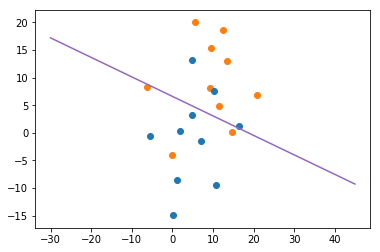

time: 3.9662623405456543
[-0.019746111477774188, -0.055983303392406779, 0.36849968003745992]
[-0.01974434 -0.0559826   0.36846728]


In [10]:
time_st1 = time.time()

w = [3, 3, 3]
left_lmb = 0.00005
right_lmb = 2.0
left_loss = estimate_loss([w[0] - left_lmb*deriv(w, 0), 
                          w[1] - left_lmb*deriv(w, 1),
                          w[2] - left_lmb*deriv(w, 2)])
right_loss = estimate_loss([w[0] - right_lmb*deriv(w, 0), 
                          w[1] - right_lmb*deriv(w, 1),
                          w[2] - right_lmb*deriv(w, 2)])
x_der = deriv(w, 0)
y_der = deriv(w, 1)
b_der = deriv(w, 2)
steps1 = 0
iter_range = [0.000001, 0.000005, 0.00001, 0.0001, 0.001, 0.1, 1, 2]

while(abs(x_der) > 0.001 or abs(y_der) > 0.001 or abs(b_der) > 0.001):
    mid_lmb = 0.000005
    mid_loss = estimate_loss([w[0] - mid_lmb*deriv(w, 0), 
                              w[1] - mid_lmb*deriv(w, 1),
                              w[2] - mid_lmb*deriv(w, 2)])
    
    for i in range(len(iter_range)):
        cur = iter_range[i]
        new_loss = estimate_loss([w[0] - cur*deriv(w, 0), 
                                  w[1] - cur*deriv(w, 1),
                                  w[2] - cur*deriv(w, 2)])
        if (new_loss < mid_loss):
            mid_loss = new_loss
            mid_lmb = cur
    #print("found", mid_lmb)
    w[0] -= mid_lmb * deriv(w, 0)
    w[1] -= mid_lmb * deriv(w, 1)
    w[2] -= mid_lmb * deriv(w, 2)
    x_der = deriv(w, 0)
    y_der = deriv(w, 1)
    b_der = deriv(w, 2)
    steps1 += 1
    
    
print("#steps =", steps1)
equation = np.array([-w[0]/w[1], -w[2]/w[1]])

line_x = np.arange(-30,45,0.1)
line_y = np.empty(line_x.shape[0])
for i in range(line_x.shape[0]):
    line_y[i] = equation[0]*line_x[i] + equation[1]
    
plt.plot(line_x, line_y, color='C4')
plt.scatter(samples[:10, 0], samples[:10, 1], color='C1')
plt.scatter(samples[10:20, 0], samples[10:20, 1], color='C0')
plt.show()
print("time:",time.time() - time_st1)
print(w)
print(real_ans)

Это steepest gradient descent, который работает быстрее и сходится по сравнению с обычным спуском тоже быстрее

#steps = 1264
[-0.01974434 -0.0559826   0.36846728]
[-0.01975139 -0.05598315  0.36857647]
time: 0.25519490242004395


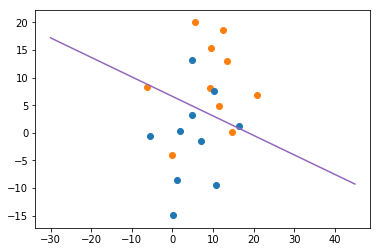

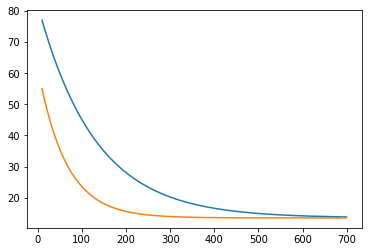

In [11]:
time_st2 = time.time()

def find_derivQ(w):
    der_Q = np.array([0.0,0.0,0.0])
    for j in range(3):
        sum = 0.0
        for i in range(20):
            sum += 2*(X[i] @ w - Y[i]) * X[i,j]
        der_Q[j] = sum
    return der_Q

def argmin(w):
    derQ = find_derivQ(w)
    lmbd = ((X @ w).T @ X @ derQ - Y.T @ X @ derQ) / ((X @ derQ).T @ X @ derQ)
    return lmbd

param = np.array([3.0, 3.0, 3.0])
x_der = 1
y_der = 1
b_der = 1
steps3 = 0
#print(find_derivQ(param))


conv_func2 = np.array([0, estimate_loss(param)])
while abs(x_der) > 0.001 and abs(y_der) > 0.001 and abs(b_der) > 0.001:
    x_der = deriv(param, 0)
    y_der = deriv(param, 1)
    b_der = deriv(param, 2)
    new_lambda = argmin(param)
    
    param[0] -= new_lambda * x_der
    param[1] -= new_lambda * y_der
    param[2] -= new_lambda * b_der
    steps3 += 1
    conv_func2 = np.vstack((conv_func2, (steps3, estimate_loss(param))))
    #print(param)
    #print(new_lambda)
    #print(x_der, y_der, b_der)


print("#steps =", steps3)
equation = np.array([-param[0]/param[1], -param[2]/param[1]])

line_x = np.arange(-30,45,0.1)
line_y = np.empty(line_x.shape[0])
for i in range(line_x.shape[0]):
    line_y[i] = equation[0]*line_x[i] + equation[1]
    
plt.plot(line_x, line_y, color='C4')
plt.scatter(samples[:10, 0], samples[:10, 1], color='C1')
plt.scatter(samples[10:20, 0], samples[10:20, 1], color='C0')
    
print(real_ans)
print(param)
print("time:", time.time() - time_st2)
plt.show()

for i in range(200):
    convergence_func[i,1] = min(convergence_func[i,1], 100)
    conv_func2[i,1] = min(conv_func2[i,1], 100)
plt.plot(convergence_func[10:700,0], convergence_func[10:700,1])   
plt.plot(conv_func2[10:700,0], conv_func2[10:700,1])
plt.show()

### 6. Stochastic gradient descent

Sometimes you have so huge amount of data, that usual gradient descent becomes too slow. One more option, we have deal with data flow. In this case stochastic gradient method appears on the stage. The idea is simple. You can do a descent step, calculating error and gradient not for all samples, but for some small batch only.

#### Еxercises
1. Download [mnist](https://www.kaggle.com/c/digit-recognizer).
2. Train linear classificator for digits 0 and 1, using logistic loss function and stochastic gradient descent.
3. Use holdout to check [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision) of classification.
4. How do accuracy and training time depend on bathch size?
5. Plot graphic that proves your words.
6. How many epochs you use? Why?
7. Plot value of loss function for each step (try use [exponential smoothing](https://en.wikipedia.org/wiki/Exponential_smoothing)).

In [12]:
time1 = time.time()
file = open('train.csv', 'r')
cnt = 0

zeros = 0
ones = 0
train_data = np.empty((8816, 785), dtype=np.float64)
train_labels = np.empty(8816)
for col in file:
    if col[0] == 'l':
        continue
    #print(col[0])
    if col[0] == '0' or col[0] == '1':
        piece_of_data = np.array(list(map(int, col.split(','))))
        train_data[cnt,:-1] = piece_of_data[1:]
        train_data[cnt,-1] = 1
        if piece_of_data[0] == 0:
            train_labels[cnt] = -1
        else:
            train_labels[cnt] = 1
        cnt += 1
    
print("time1:",time.time() - time1)
#print(train_data.shape)

for i in range(8816):
    cur_sum = np.sum(train_data[i])
    avr = cur_sum / 785
    train_data[i] -= avr
    disp = np.sqrt(np.sum((train_data[i]) ** 2) / 785)
    train_data[i] /= disp
    

plane = np.zeros(785)
derivs = np.empty(785)

def eval_loss(plane, batch):
    loss = 0.0
    for i in batch:
        deg = -train_labels[i] * (plane @ train_data[i])
        if (deg > 20):
            degexp = np.exp(20)
        else:
            degexp = np.exp(deg)
        loss += np.log(1 + degexp)
        #print(loss)
    return loss

def find_deriv(plane, batch, var):
    cur_der = 0.0
    for i in batch:
        deg = -train_labels[i] * (plane @ train_data[i])
        #if deg > 100:
        #    print("deg > 100")
        if (deg > 20):
            degexp = np.exp(20)
        else:
            degexp = np.exp(deg) 
        cur_der += (1 - (1 / (1 + degexp))) * (-1) * train_labels[i] * train_data[i, var]
    return cur_der

def find_grad(plane, batch):
    gradient = np.empty(785)
    for i in range(785):
        gradient[i] = find_deriv(plane, batch, i)
    return gradient

def generate_batch(sz):
    batch = np.random.randint(7816, size=sz)
    return batch

def gen_train_set(sz):
    holdout_set = np.random.randint(8816, size = sz)
    return holdout_set

def gen_batch_holdout(sz, holdout_set):
    batch_iter = np.random.randint(len(holdout_set), size = sz)
    batch_set = np.empty(sz, dtype=np.int)
    for i in range(sz):
        batch_set[i] = holdout_set[batch_iter[i]]
    return batch_set

#print(gen_batch_holdout(100, gen_holdout_set(1000)))
        

BatchSize = 10

nabla_plane = find_grad(plane, generate_batch(BatchSize))
print(np.max(np.absolute(nabla_plane)))
steps = 0

while (np.max(np.absolute(nabla_plane)) > 0.0001):
    #print(plane[:10],"---", nabla_plane[:10])
    plane = np.subtract(plane, 0.1 * nabla_plane)
    #print(plane[:10])
    #print()
    batch = generate_batch(BatchSize)
    nabla_plane = find_grad(plane, batch)
    steps += 1
    #if steps % 1 == 0:
        #print(steps, np.max(np.absolute(nabla_plane)))
        #print(eval_loss(plane, batch))
        #print(plane[:100])

predicted = 0
for i in range(7816, 8816):
    if (train_labels[i] == np.sign(plane @ train_data[i])):
        predicted += 1
        
print("accuracy:", predicted / 1000)
print("steps:", steps)
print("total time:", time.time() - time1)

time1: 1.4273266792297363
11.641140138
accuracy: 0.995
steps: 1
total time: 1.6566967964172363


it takes time to run SGD many times


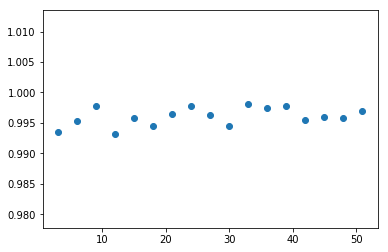

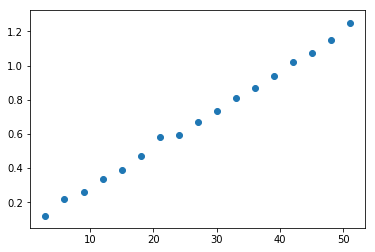

In [14]:
def SGD(find_grad, batchSize, epochs, trainSize, coeff=0.1):
    train_time = time.time()
    plane = np.zeros(785)
    train_set = gen_train_set(trainSize)
    new_batch = gen_batch_holdout(batchSize, train_set)
    #print(new_batch)
    nabla_plane = find_grad(plane, new_batch)
    for i in range(epochs):
        plane = np.subtract(plane, coeff * nabla_plane)
        new_batch = gen_batch_holdout(batchSize, train_set)
        nabla_plane = find_grad(plane, new_batch)
    predicted = 0.0
    for i in range(8816):
        if (train_labels[i] == np.sign(plane @ train_data[i])):
            predicted += 1
    return (predicted / 8816, time.time() - train_time)

#print(SGD(100, 20, 6000))
x_points = np.arange(3, 52, 3)
y_acc_points = np.empty(17)
y_time_points = np.empty(17)
print("it takes time to run SGD many times")
for i in range(3, 52, 3):
    (cur_acc, cur_time) = SGD(find_grad, i, 7, 3000)
    y_acc_points[i // 3 - 1] = cur_acc
    y_time_points[i // 3 - 1] = cur_time
plt.scatter(x_points, y_acc_points)
plt.show()
plt.scatter(x_points, y_time_points)
plt.show()
    

с использованием exponential smoothing узнаем, как меняется функция потерь от количества шагов. Видно, что при разных запусках графики сильно отличаются, потому что батчи берутся рандомно и малого размера относительно всей выборки, но, как правило, потеря довольно быстро становится очень малой

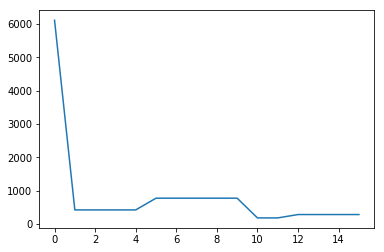

In [15]:
def expSmoothing(batchSize, epochs, trainSize, alpha, coeff=0.1):
    expSmth_time = time.time()
    plane = np.zeros(785)
    train_set = gen_train_set(trainSize)
    new_batch = gen_batch_holdout(batchSize, train_set)
    #print(new_batch)
    nabla_plane = find_grad(plane, new_batch)
    loss_values = np.zeros(epochs + 1)
    loss_values[0] = eval_loss(plane, range(8816))
    for i in range(epochs):
        plane = alpha * np.subtract(plane, coeff * nabla_plane) + (1 - alpha) * plane
        new_batch = gen_batch_holdout(batchSize, train_set)
        nabla_plane = find_grad(plane, new_batch)
        loss_values[i + 1] = eval_loss(plane, range(8816))

        
    predicted = 0.0
    for i in range(8816):
        if (train_labels[i] == np.sign(plane @ train_data[i])):
            predicted += 1
    return (predicted / 8816, time.time() - expSmth_time, loss_values)

(acc, exec_time, loss_vals) = expSmoothing(15, 15, 4000, 0.7)
x_loss_func = np.arange(0, 16)
plt.plot(x_loss_func, loss_vals)
plt.show()

#### Momentum method
Stochastic gradient descent with momentum remembers the update of $x$ at each iteration, and determines the next update as a linear combination of the gradient and the previous update
$$x^{k+1} = x^{k} - s^{k},$$ where $s^k = \gamma s^{k-1} + \lambda\triangledown Q(x^k)$, $0 <\gamma < 1$ – smoothing ratio and $s^{-1} = 0$.

#### Еxercises
1. Find minimum for $Q(x,y)=10x^2+y^2$ with descent method.
2. Use momentum method and compare pathes.
3. How do you choose $\gamma$?

simple method took: 756 steps

time: 0.009178400039672852
gamma = 0.5 - momenthum took 341 steps

time: 0.007771015167236328
gamma = 0.9 - momenthum took 283 steps


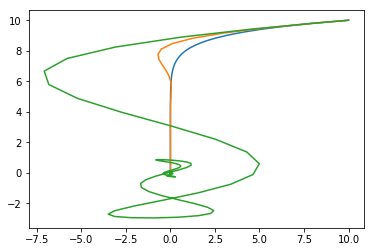

In [16]:
def find_grad(point):
    grad = np.array([20 * point[0], 2 * point[1]])
    return grad

def simple_descent(find_grad, coeff=0.01):
    point = np.array([10.0, 10.0])
    nabla_Q = find_grad(point)
    path = np.empty((1,2))
    path[0] = point
    while np.max(np.absolute(nabla_Q)) > 0.01:
        point -= coeff * nabla_Q
        path = np.vstack((path, (point)))
        nabla_Q = find_grad(point)
        #print(nabla_Q)
    return path

def momenthum_method(gamma, find_grad, coeff=0.01, pointval=10.0):
    time_momenthum = time.time()
    point = np.array([pointval,pointval])
    nabla_Q = find_grad(point)
    prev_grad = np.array([0,0])
    path = np.empty((1, 2))
    path[0] = point
    #while nabla_Q.any != [0, 0]:
    steps = 0
    while np.max(np.absolute(nabla_Q)) > 0.00001:
        #if steps % 10000 == 0:
            #print(np.max(np.absolute(nabla_Q)))
        point -= gamma * prev_grad + coeff * nabla_Q
        #path = np.vstack((path, (point)))
        if steps < 1000 or steps % 1000 == 0:
            path = np.vstack((path, (point)))
        #prev_grad = gamma * prev_grad + coeff * nabla_Q
        prev_grad = gamma * prev_grad + coeff * nabla_Q
        nabla_Q = find_grad(point)
        #print(prev_grad, nabla_Q)
        steps += 1
        
    print("time:", time.time() - time_momenthum)
    return (steps, path)

simple_path = simple_descent(find_grad)
print("simple method took:", simple_path.size, "steps")
print()
#print('simple finished')
(steps1, momenthum_path_1) = momenthum_method(0.5, find_grad)
print("gamma = 0.5 - momenthum took", steps1, "steps")
print()
#print('mmn_1 finished')
(steps2, momenthum_path_2) = momenthum_method(0.9, find_grad)
#print('mmn_2 finished')
print("gamma = 0.9 - momenthum took", steps2, "steps")

plt.plot(simple_path[:,0], simple_path[:,1])
plt.plot(momenthum_path_1[:,0], momenthum_path_1[:,1])
plt.plot(momenthum_path_2[:,0], momenthum_path_2[:,1])
plt.show()
    

Как видно, увеличивая $\gamma$ до некоторого значения, сходимость происходит быстрее, но уже при 0.9 начинаются слишком большие виляния, которые могут привести к тому, что значения в точке окажутся слишком большими, градиент тоже будет большим, и функция не сойдется. 

#### Nesterov accelerated gradient
And the logical development of this approach leads to the accelerated Nesterov's gradient. The descent step is calculated a little differently
$$s^k = \gamma s^{k-1} + \lambda\triangledown Q(x^k - \gamma s^{k-1}),$$
so we find gradient at the point which moment will move us.

#### Еxercises
1. Compare this method and previous with Rosenbrock function.
2. Plot traces of both algorithms.

time: 0.40059781074523926
Nesterov gradient finished in: 29509 steps

time: 0.38057637214660645
Momenthum method finished in: 27453 steps


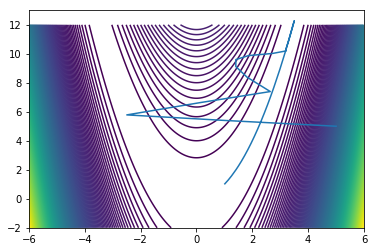

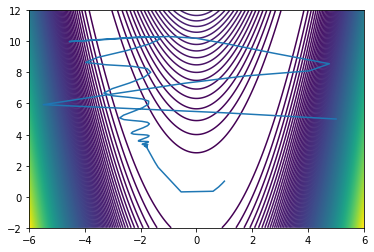

In [17]:
def find_grad(point):
    x = point[0]
    y = point[1]
    
    x_grad =  400*x*x*x - 400*x*y + 2*x -2
    y_grad =  200*y - 200*x*x
    grad = np.array([x_grad, y_grad])
    return grad

def Nesterov_Accelerated_Grad(gamma, find_grad, pointval = 5.0, coeff=0.0001):
    time_nest = time.time()
    point = np.array([pointval,pointval])
    prev_grad = np.array([0,0])
    nabla_Q = find_grad(point - gamma * prev_grad)
    path = np.empty((1, 2))
    path[0] = point
    #while nabla_Q.any != [0, 0]:
    steps = 0
    while np.max(np.absolute(nabla_Q)) > 0.01:
        #nabla_Q = find_grad(point - gamma * prev_grad)
        #print(point, nabla_Q)
        point -= gamma * prev_grad + coeff * nabla_Q
        if steps < 1000 or steps % 1000 == 0:
            path = np.vstack((path, (point)))
        prev_grad = gamma * prev_grad + coeff * nabla_Q
        #prev_grad = gamma * nabla_Q + coeff * nabla_Q
        nabla_Q = find_grad(point - gamma * prev_grad)
        #print(prev_grad, nabla_Q)
        #print(nabla_Q)
        #print(point)
        steps += 1
        #if steps % 10000 == 0:
            #print(steps)
    print("time:", time.time() - time_nest)
    return (steps, path)

(steps, nesterov_path) = Nesterov_Accelerated_Grad(0.9, find_grad)
print("Nesterov gradient finished in:", steps, "steps")
print()
plt.plot(nesterov_path[:,0], nesterov_path[:,1])

(steps, momenthum_path) = momenthum_method(0.9, find_grad, 0.0001, 5.0)
print("Momenthum method finished in:", steps, "steps")

cont_x = np.arange(-6, 6, 0.01)
cont_y = np.arange(-2, 12, 0.01)
grid_x, grid_y = np.meshgrid(cont_x, cont_y)
grid_z = (1 - grid_x) * (1 - grid_x) + 100 * (grid_y - grid_x * grid_x) * (grid_y - grid_x * grid_x)
levels = np.arange(-2,2,0.01)
pylab.contour(grid_x, grid_y, grid_z, 200)
#pylab.contour(grid_x, grid_y, grid_z, 100)
#plt.scatter(x_dots, y_dots, s=2.5, color='C1')

plt.show()


plt.plot(momenthum_path[:,0], momenthum_path[:,1])

pylab.contour(grid_x, grid_y, grid_z, 200)
plt.show()

Momenthum работает чуть быстрее, но виляет тоже быстрее, что при небольших изменениях коэффициентов может привести к расходимости

#### Adagrad (2011)
Adaptive gradient finds lambda for each dimension of the input vector x. Informally speaking, for sparce features it makes a bigger step, but for regular ones smaller step.
$$x_{i}^{k + 1} = x_{i}^{k} - \frac{\lambda}{\sqrt{G_{i, i}^k } + \varepsilon} \cdot \frac{\partial Q}{\partial x_i}(x^k),$$
* $G^{k} = \sum_{t=1}^{k}g_t g_t^{T}$, где $g_t = \triangledown Q(x^t)$.
* $\varepsilon$ - epsilon to avoid division by zero.
It improves convergence of the learning process (e.g. when using neural networks for text).

#### RMSprop
To avoid growth of the denominator we can use the following modification. Let's calculate the matrix $G^k$ only for a small number of latest steps, it can be done for example using exponential smoothing.
$$G^{k+1} = \gamma G^{k} + (1 - \gamma)g_{k+1}g_{k+1}^{T},$$
where $0< \gamma < 1$ - smoothing factor

#### Еxercises
1. Read about adadelta and adam (links below).
2. Give an example of a function that can show the difference in the studied stohastic gradient methods.
3. Show animation step by step how methods work.
4. Use your favorite method on mnist dataset again.
5. Show convergence of alrotigthm.
6. Check quality, using holdout.

#### Papers
1. [Adadelta (2012)](https://arxiv.org/pdf/1212.5701.pdf)
2. [Adam (2015)](https://arxiv.org/pdf/1412.6980.pdf)

Let's use function $Q(x, y) = 3 x ^ 2 + 6y^2 $ 

finished in 196 steps time: 0.006365060806274414


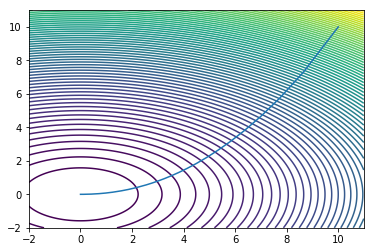

In [18]:
def find_grad(point):
    grad = np.array([6 * point[0], 12 * point[1]])
    return grad

def Adagrad(find_grad, coeff=3):
    time_adagrad = time.time()
    point = np.array([10.0, 10.0])
    Denom = 0
    nabla_Q = find_grad(point)
    Denom += nabla_Q @ nabla_Q
    path = np.empty((1, 2))
    path[0] = point
    steps = 0
    while np.max(np.absolute(nabla_Q)) > 0.00001:
        point -= (coeff / (np.sqrt(Denom) + 0.00001)) * nabla_Q
        nabla_Q = find_grad(point)
        Denom += nabla_Q @ nabla_Q
        steps += 1
        if steps % 10000 or steps < 1000:
            path = np.vstack((path, (point)))
        if steps % 10000 == 0:
            print(steps, np.max(np.absolute(nabla_Q)))
            
    print("finished in", steps,"steps", "time:", time.time() - time_adagrad)
    return (steps, path)

(steps, adagrad_path) = Adagrad(find_grad)
plt.plot(adagrad_path[:,0], adagrad_path[:,1])
cont_x = np.arange(-2, 11, 0.01)
cont_y = np.arange(-2, 11, 0.01)
grid_x, grid_y = np.meshgrid(cont_x, cont_y)
grid_z = 3 * grid_x * grid_x + 6 * grid_y * grid_y
levels = np.arange(-2,2,0.01)
pylab.contour(grid_x, grid_y, grid_z, 100)
plt.show()




finished in 15 steps time: 0.0009500980377197266


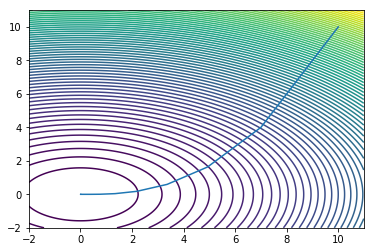

In [19]:
def RMSprop(find_grad, gamma, coeff=3):    
    time_RMSprop = time.time()
    point = np.array([10.0, 10.0])
    Denom = 0
    nabla_Q = find_grad(point)
    Denom = (1 - gamma) * nabla_Q @ nabla_Q
    path = np.empty((1, 2))
    path[0] = point
    steps = 0
    while np.max(np.absolute(nabla_Q)) > 0.00001:
        point -= (coeff / (np.sqrt(Denom) + 0.00000001)) * nabla_Q
        nabla_Q = find_grad(point)
        Denom = gamma * Denom + (1 - gamma) * (nabla_Q @ nabla_Q)
        steps += 1
        if steps % 10000 or steps < 1000:
            path = np.vstack((path, (point)))
        if steps % 10000 == 0:
            print(steps, np.max(np.absolute(nabla_Q)))
            
    print("finished in", steps,"steps", "time:", time.time() - time_RMSprop)
    return (steps, path)

(steps, RMSprop_path) = RMSprop(find_grad, 0.8)
plt.plot(RMSprop_path[:,0], RMSprop_path[:,1])
cont_x = np.arange(-2, 11, 0.01)
cont_y = np.arange(-2, 11, 0.01)
grid_x, grid_y = np.meshgrid(cont_x, cont_y)
grid_z = 3 * grid_x * grid_x + 6 * grid_y * grid_y
levels = np.arange(-2,2,0.01)
pylab.contour(grid_x, grid_y, grid_z, 100)
plt.show()

wtf. too fast

finished in 109 steps time: 0.004033803939819336


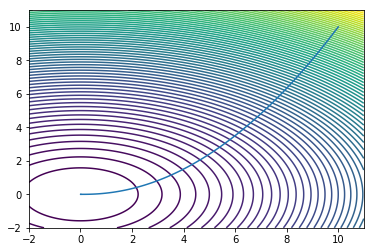

In [20]:
def Adadelta(find_grad, gamma):
    time_Adadelta = time.time()
    point = np.array([10.0, 10.0])
    Denom = 0
    nabla_Q = find_grad(point)
    Denom = (1 - gamma) * (nabla_Q @ nabla_Q)
    Update = 0
    
    path = np.empty((1, 2))
    path[0] = point
    steps = 0
    while np.max(np.absolute(nabla_Q)) > 0.0001:
        delta = (np.sqrt(Update + 0.01) / (np.sqrt(Denom) + 0.00000001)) * nabla_Q
        nabla_Q = find_grad(point)
        Denom = gamma * Denom + (1 - gamma) * (nabla_Q @ nabla_Q)
        Update = gamma * Update + (1 - gamma) * (delta @ delta)
        point -= delta
        steps += 1
        if steps % 10000 or steps < 1000:
            path = np.vstack((path, (point)))
        if steps % 10000 == 0:
            print(steps, np.max(np.absolute(nabla_Q)))
            
    print("finished in", steps,"steps", "time:", time.time() - time_Adadelta)
    return (steps, path)

(steps, Adadelta_path) = Adadelta(find_grad, 0.85)
plt.plot(Adadelta_path[:,0], Adadelta_path[:,1])
cont_x = np.arange(-2, 11, 0.01)
cont_y = np.arange(-2, 11, 0.01)
grid_x, grid_y = np.meshgrid(cont_x, cont_y)
grid_z = 3 * grid_x * grid_x + 6 * grid_y * grid_y
levels = np.arange(-2,2,0.01)
pylab.contour(grid_x, grid_y, grid_z, 100)
plt.show()

finished in 63 steps time: 0.0032052993774414062


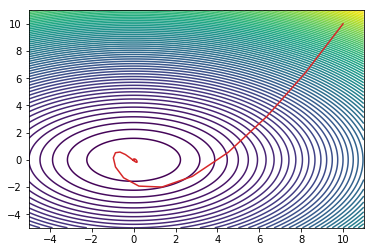

In [21]:
def Adam(find_grad, beta1, beta2, coeff=4):
    time_Adam = time.time()
    point = np.array([10.0, 10.0])
    first_moment = np.zeros(2)
    second_moment = 0
    nabla_Q = find_grad(point)
    beta1_powered = beta1
    beta2_powered = beta2
    
    path = np.empty((1, 2))
    path[0] = point
    steps = 0
    while np.max(np.absolute(nabla_Q)) > 0.00001:
        nabla_Q = find_grad(point)
        first_moment = beta1 * first_moment + (1 - beta1) * nabla_Q
        second_moment = beta2 * second_moment + (1 - beta2) * (nabla_Q @ nabla_Q)
        bias_corr_first = first_moment / (1 - beta1_powered)
        bias_corr_second = second_moment / (1 - beta2_powered)
        beta1_powered *= beta1
        beta2_powered *= beta2
        point -= coeff * (bias_corr_first / (np.sqrt(bias_corr_second + 0.00000001)))
        steps += 1
        if steps % 10000 or steps < 1000:
            path = np.vstack((path, (point)))
        if steps % 10000 == 0:
            print(steps, np.max(np.absolute(nabla_Q)))
            
    print("finished in", steps,"steps", "time:", time.time() - time_Adam)
    return (steps, path)

(steps, Adam_path) = Adam(find_grad, 0.6, 0.999)
plt.plot(Adam_path[:,0], Adam_path[:,1], color='C3')
cont_x = np.arange(-5, 11, 0.01)
cont_y = np.arange(-5, 11, 0.01)
grid_x, grid_y = np.meshgrid(cont_x, cont_y)
grid_z = 3 * grid_x * grid_x + 6 * grid_y * grid_y
levels = np.arange(-2,2,0.01)
pylab.contour(grid_x, grid_y, grid_z, 100)
plt.show()

time: 0.00883173942565918
momenthum_method finished in 262 steps


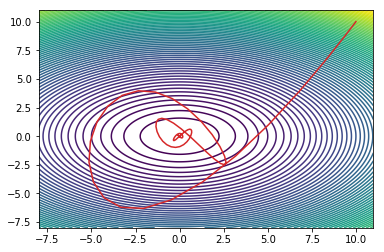

In [24]:
(steps, Momenthum_path) = momenthum_method(0.9, find_grad)
print("momenthum_method finished in", steps, "steps")
plt.plot(Momenthum_path[:,0], Momenthum_path[:,1], color='C3')
cont_x = np.arange(-8, 11, 0.01)
cont_y = np.arange(-8, 11, 0.01)
grid_x, grid_y = np.meshgrid(cont_x, cont_y)
grid_z = 3 * grid_x * grid_x + 6 * grid_y * grid_y
levels = np.arange(-2,2,0.01)
pylab.contour(grid_x, grid_y, grid_z, 100)
plt.show()

time: 0.006859540939331055
Nesterov_method finished in 145 steps


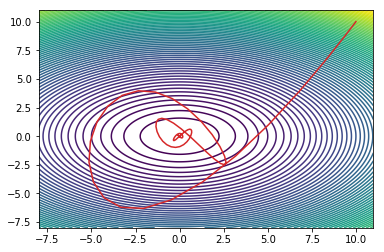

In [25]:
(steps, Nesterov_path) = Nesterov_Accelerated_Grad(0.99, find_grad, 10.0, 0.01)
print("Nesterov_method finished in", steps, "steps")
plt.plot(Momenthum_path[:,0], Momenthum_path[:,1], color='C3')
cont_x = np.arange(-8, 11, 0.01)
cont_y = np.arange(-8, 11, 0.01)
grid_x, grid_y = np.meshgrid(cont_x, cont_y)
grid_z = 3 * grid_x * grid_x + 6 * grid_y * grid_y
levels = np.arange(-2,2,0.01)
pylab.contour(grid_x, grid_y, grid_z, 100)
plt.show()

In [42]:
import matplotlib.pyplot as plt
import matplotlib.animation

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
ax.axis([-7.5, 11, -7.5, 11])
l, = ax.plot([],[], label='Adam')
d, = ax.plot([],[], label='Nesterov')
g, = ax.plot([],[], label='Momenthum')
s, = ax.plot([],[], label='Adadelta')

def animate(i):
    l.set_data(Adam_path[:i,0], Adam_path[:i,1])
    d.set_data(Nesterov_path[:i,0], Nesterov_path[:i,1])
    g.set_data(Momenthum_path[:i,0], Momenthum_path[:i,1])
    s.set_data(Adadelta_path[:i,0], Adadelta_path[:i,1])


from IPython.display import HTML
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=150)
plt.legend(handles=[l, d, g, s])
HTML(ani.to_jshtml())

Let's use Adam method

In [41]:
file = open('train.csv', 'r')
cnt = 0

zeros = 0
ones = 0
train_data = np.empty((8816, 785), dtype=np.float64)
train_labels = np.empty(8816)
for col in file:
    if col[0] == 'l':
        continue
    #print(col[0])
    if col[0] == '0' or col[0] == '1':
        piece_of_data = np.array(list(map(int, col.split(','))))
        train_data[cnt,:-1] = piece_of_data[1:]
        train_data[cnt,-1] = 1
        if piece_of_data[0] == 0:
            train_labels[cnt] = -1
        else:
            train_labels[cnt] = 1
        cnt += 1
    
#print("time1:",time.time() - time1)
#print(train_data.shape)

for i in range(8816):
    cur_sum = np.sum(train_data[i])
    avr = cur_sum / 785
    train_data[i] -= avr
    disp = np.sqrt(np.sum((train_data[i]) ** 2) / 785)
    train_data[i] /= disp
    

plane = np.zeros(785)

def generate_batch(sz):
    begin = 0
    finish = 3000
    while begin < finish:
        end = min(begin + sz, finish)
        yield np.arange(begin, end)
        begin = end

def find_deriv(plane, batch, var):
    cur_der = 0.0
    for i in batch:
        deg = -train_labels[i] * (plane @ train_data[i])
        #if deg > 100:
        #    print("deg > 100")
        if (deg > 20):
            degexp = np.exp(20)
        else:
            degexp = np.exp(deg) 
        cur_der += (1 - (1 / (1 + degexp))) * (-1) * train_labels[i] * train_data[i, var]
    return cur_der

def find_grad(plane, batch):
    gradient = np.empty(785)
    for i in range(785):
        gradient[i] = find_deriv(plane, batch, i)
    return gradient


def Adam_for_MNIST(find_grad, beta1, beta2, batchSize = 10, coeff=4):
    time_Adam = time.time()
    point = np.zeros(785)
    first_moment = np.zeros(785)
    second_moment = 0
    batch_generator = generate_batch(batchSize)
    nabla_Q = find_grad(point, np.arange(0,15))
    beta1_powered = beta1
    beta2_powered = beta2
    
    path = np.empty((1, 785))
    steps = 0
    epoch = 0
    while epoch < 1:
        batch_generator = generate_batch(batchSize)
        for cur_batch in batch_generator:
            nabla_Q = find_grad(point, cur_batch)
            first_moment = beta1 * first_moment + (1 - beta1) * nabla_Q
            second_moment = beta2 * second_moment + (1 - beta2) * (nabla_Q @ nabla_Q)
            bias_corr_first = first_moment / (1 - beta1_powered)
            bias_corr_second = second_moment / (1 - beta2_powered)
            beta1_powered *= beta1
            beta2_powered *= beta2
            point -= coeff * (bias_corr_first / (np.sqrt(bias_corr_second + 0.0000001)))
            steps += 1
            if steps % 100 == 0:
                print(steps)
        epoch += 1
    print("finished in", steps,"steps", "time:", time.time() - time_Adam)
    return point

param = Adam_for_MNIST(find_grad, 0.9, 0.99)
acc = 0
for i in range(3000, 8816):
    if train_labels[i] == np.sign(param @ train_data[i]):
        acc += 1
        
print("accuracy:", acc / 5816)

100
200
300
finished in 300 steps time: 9.300560712814331
accuracy: 0.9986244841815681


Я запускаю на целую эпоху, поэтому работает не очень быстро
Но, чтобы немного ускорить, я учу на 3000 картинок из 8816

Количество эпох: 1

Размер батча: 10

Шаг - это рассмотрение одного батча

Точность измеряю по оставшимся 5816 картинкам